ASSUMPTIONS IN MULTILINEAR REGRESSION

1. Linearity: The relationship b/w the predictors and the response is linear.
2. Independence: Observations are independent of each other.
3. Homoscedasticity: The residuals(Y - (Y_hat)) exhibit constant variance at all levels of the predictor.
4. Normal Distribution of Errors: The residuals of the model are normally distributed.
5. No multicollinearity: The independent variables should not be too highly correlated with each other.
   Violations of these assumptions may lead to inefficiency in the regression parameters and unreliable predictions
The general formula for multiple linear regression is:

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [69]:
#READ THE DATA FROM CSV FILE
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [71]:
#RENAME THE COLUMNS
cars = pd.DataFrame(cars, columns=["HP", "VOL", "SP", "WT", "MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


### DESCRIPTIONS OF COLUMNS

- MPG: Milege of the car(Mile per Gallon)(This is Y-column to be predicted)
- HP: Horse Power of the car (X1 column)
- VOL: Volume of the car(size)(X2 column)
- SP: Top speed of the car(Miles per Hour)(X3 column)
- WT: Weight of the car(Pounds)(X4 column)

#### EDA

In [75]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [77]:
#CHECK FOR MISSING VALUES
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

### OBSERVATIONS
- There are no missing values
- There are 81 observations (81 different cars data)
- The data types of the columns are also relevant and valid

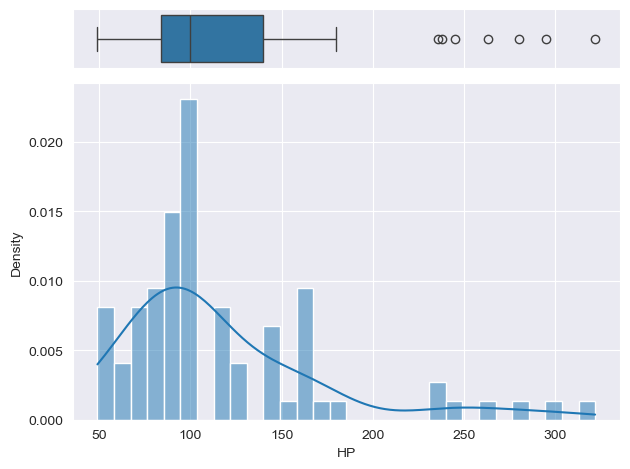

In [80]:
#CREATE A FIGURE WITH TWO SUBPLOTS (ONE ABOVE THE OTHER)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

#CREATING A BOX PLOT
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the box plot

#CREATING A HISTOGRAM IN THE SAME X-XIS
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")

#ADJUST LAYOUT
plt.tight_layout()
plt.show()

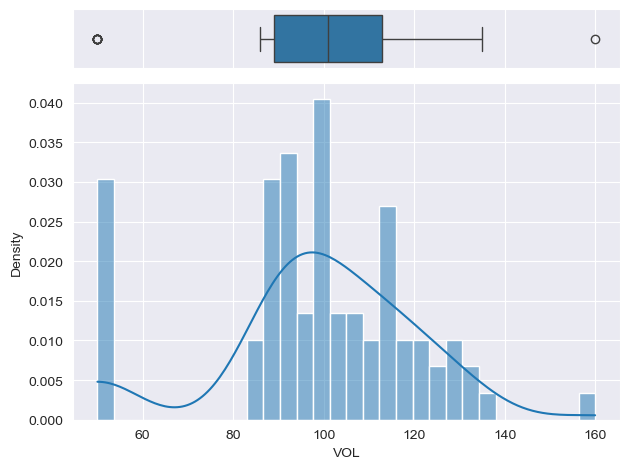

In [81]:
#CREATE A FIGURE WITH TWO SUBPLOTS (ONE ABOVE THE OTHER)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

#CREATING A BOX PLOT
sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the box plot

#CREATING A HISTOGRAM IN THE SAME X-AXIS
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat="density")

#ADJUST LAYOUT
plt.tight_layout()
plt.show()

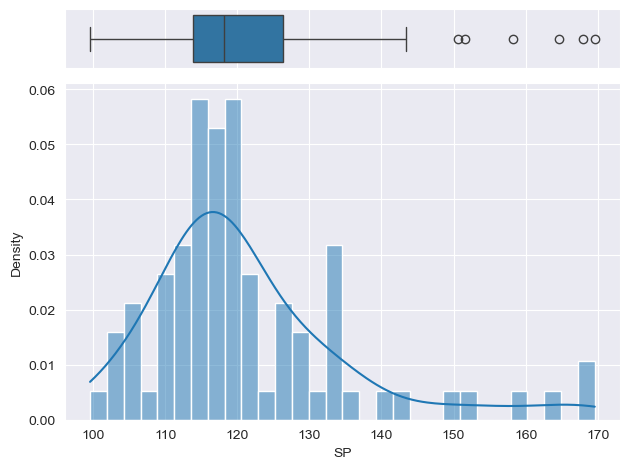

In [82]:
#CREATE A FIGURE WITH TWO SUBPLOTS (ONE ABOVE THE OTHER)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

#CREATING A BOX PLOT
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the box plot

#CREATING A HISTOGRAM IN THE SAME X-AXIS
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")

#ADJUST LAYOUT
plt.tight_layout()
plt.show()

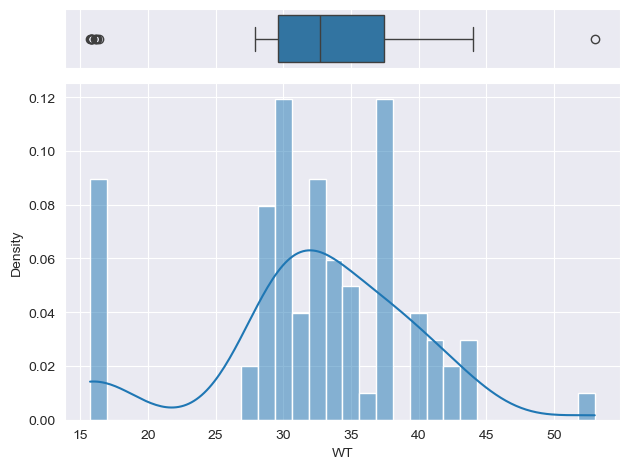

In [84]:
#CREATE A FIGURE WITH TWO SUBPLOTS (ONE ABOVE THE OTHER)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

#CREATING A BOX PLOT
sns.boxplot(data=cars, x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the box plot

#CREATING A HISTOGRAM IN THE SAME X-AXIS
sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde=True, stat="density")

#ADJUST LAYOUT
plt.tight_layout()
plt.show()

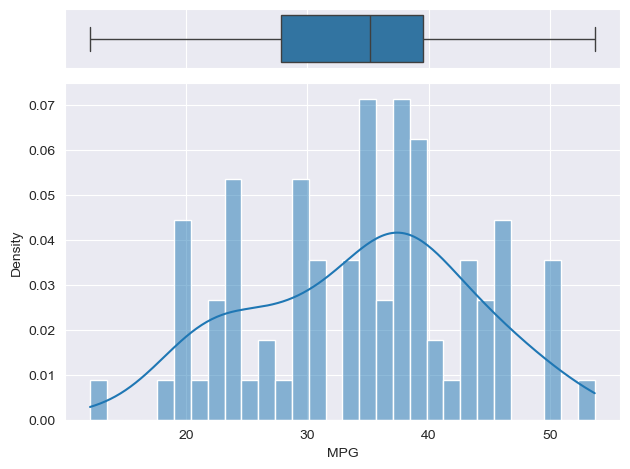

In [85]:
#CREATE A FIGURE WITH TWO SUBPLOTS (ONE ABOVE THE OTHER)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

#CREATING A BOX PLOT
sns.boxplot(data=cars, x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the box plot

#CREATING A HISTOGRAM IN THE SAME X-AXIS
sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde=True, stat="density")

#ADJUST LAYOUT
plt.tight_layout()
plt.show()

### OBSERVATIONS from boxplot and histograms
- There are some extreme values(outliers) observed in towards the right tail of SP and HP distributions.
- In VOL and WT columns, a few outliers are observed in both tails of their distributions.
- The extreme values of cars data may have come from the specially designed nature of cars.
- As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model.

#### Checking for duplicated rows

In [89]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


#### Pair plots and Correlation Coefficients

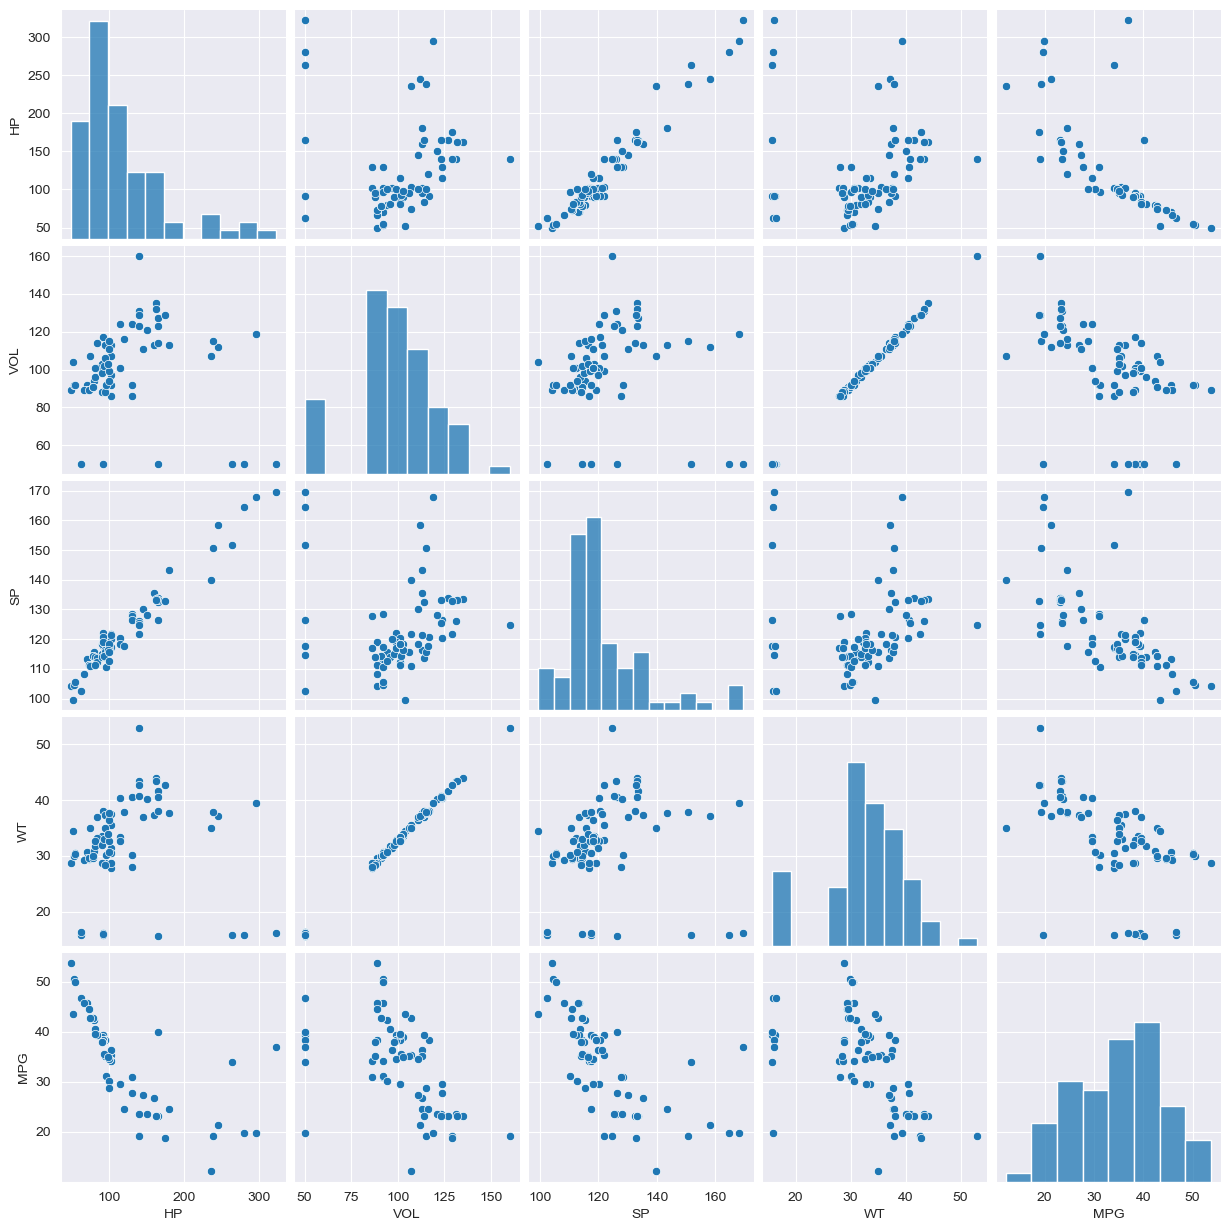

In [92]:
#PAIR PLOT
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [93]:
#CORRELATION MATRIX
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


### OBSERVATIONS
- B/w x and y, all the x variables are showing moderate to high correlation strengths, highest being b/w HP and MPG.
- Therefore this dataset qualifies for buliding a multiple linear regression model to predict MPG.
- Among x columns (x1,x2,x3 and x4), some very high correlation strengths are observed b/w SP vs HP, VOL vs WT.
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem.

#### Preparing a preliminary model considering all X columns

In [98]:
#BUILD MODEL
#IMPORT STATSMODELS.FORMULAS.API AS SMF
model1 = smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()

In [100]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        11:21:36   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## observation from model summary
 - The R-squared and adjusted R-suared values are good and about 75% of variability in y is explained by X columns
 - The probability value with respect to F-statistic is closed to zero indicating that all or some of X columns are significant
 - The p-values for VOL and WT are higer than 5% indicating some intercation issue among themselves which need to be further explored

## performance metrics for model1

In [102]:
df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [104]:
pred_y1 = model1.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


# 

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :", mean_squared_error(df1["actual_y1"], df1["pred_y1"]))

MSE : 18.897141152343096


## F-test in multiple linear Regression
 - in the context of multiple linear regression,the F-test is a statistical test used to determine